In [ ]:
# Créditos/Agradecimentos
# https://www.kaggle.com/datasets/gregsvein55/canola-diseases
# https://www.tensorflow.org/tutorials/images/classification
# https://www.tensorflow.org/tutorials/keras/save_and_load
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img
# https://discuss.tensorflow.org/t/sequential-object-has-no-attribute-predict-classes/10157/3

# Bibliotecas

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

import matplotlib.pyplot as plt
import numpy as np

# Carregar dados

In [2]:
dir= pathlib.Path(".\\archive\\training\\training")
batch_size = 32
height = 200
width = 200

In [3]:
train = tf.keras.utils.image_dataset_from_directory(
  dir,
  seed=123,
  image_size=(height, width),
  batch_size=batch_size)

Found 640 files belonging to 2 classes.


In [4]:
classes = train.class_names
print(classes)

['Diseased', 'Healthy']


# Visualizando os dados

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

# Criando os modelos

In [ ]:
data_increase = keras.Sequential([layers.RandomFlip("horizontal",input_shape=(height,width,3)),layers.RandomRotation(0.15),layers.RandomZoom(0.15),])

In [ ]:
model = Sequential([
  data_increase,
  layers.Rescaling(1./255, input_shape=(height, width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(classes))
])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [8]:
model2 = Sequential([
  data_increase,
  layers.Rescaling(1./255, input_shape=(height, width, 3)),
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(classes))
])
model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [9]:
model3 = Sequential([
  layers.Rescaling(1./255, input_shape=(height, width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(classes))
])
model3.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [10]:
model4 = Sequential([
  layers.Rescaling(1./255, input_shape=(height, width, 3)),
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(classes))
])
model4.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
trainModel = model.fit(
  train,
  epochs=15
)
trainModel2 = model2.fit(
  train,
  epochs=15
)
trainModel3 = model3.fit(
  train,
  epochs=15
)
trainModel4 = model4.fit(
  train,
  epochs=15
)

# Verificando modelos

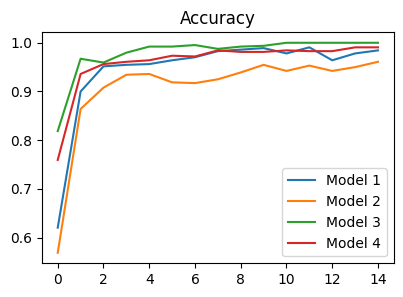

In [12]:
models = [trainModel,trainModel2,trainModel3,trainModel4]
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
for i, trained_model in enumerate(models):
    plt.plot(range(15), trained_model.history['accuracy'], label=f'Model {i+1}' )
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.show()

# Salvar modelos

In [ ]:
model.save('model1')
model2.save('model2')
model3.save('model3')
model4.save('model4')

# Carregar modelo(s)

In [14]:
model3 = tf.keras.models.load_model('model3')

# Predict

In [15]:
dir= pathlib.Path(".\\archive\\testing")
test = tf.keras.utils.image_dataset_from_directory(
  dir,
  seed=123,
  image_size=(height, width),
  batch_size=batch_size)


Found 4 files belonging to 2 classes.


In [16]:
(model3.predict(test) > 0.5).astype("int32")

1/1 [==============================] - 1s 653ms/step


array([[1, 0],
       [1, 0],
       [0, 1],
       [0, 1]])